In [2]:
import sys
#sys.modules.pop('CLASS_BABY')
#sys.modules.pop('CLASS_SAMPLE')


from CLASS_BABY import *
from CLASS_SAMPLE import *

import numpy as np
import scipy.stats as ss

#bigger fonts
import matplotlib
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15)
matplotlib.rcParams.update({'font.size': 20})

In [43]:
def median_in_bins_err(x,y,x1,x2,nbins,p1=0.25,p2=0.75):
    medians_x = np.zeros(nbins)
    medians_y = np.zeros(nbins)
    err_y_low = np.zeros(nbins)
    err_y_high = np.zeros(nbins)
    x = np.array(x)
    y = np.array(y)
    width = (float(x2)-float(x1))/nbins
    for i in range(int(nbins)):
        x_low = x1 + i*width
        x_high = x1+ (i+1)*width
        sel = np.where((x>x_low)&(x<x_high))
        print(x_low, x_high," : ",len(sel[0]))
        temp_ord = np.copy(y[sel])
        temp_ord = np.sort(temp_ord)
        medians_y[i] = temp_ord[int(len(temp_ord)*0.50 + 0.5)]
        err_y_low[i]  = np.abs(temp_ord[int(len(temp_ord)*p1 + 0.5)]-medians_y[i])
        err_y_high[i]  = np.abs(temp_ord[int(len(temp_ord)*p2 + 0.5)]-medians_y[i])
        #err_y[i] = [err_y_low,err_y_high]
        medians_x[i] = np.median(x[sel])
    print('---')
    return np.array(medians_x),np.array(medians_y),err_y_low,err_y_high

In [44]:
def mean_in_bins_err(x,y,x1,x2,nbins):
    mean_x = np.zeros(nbins)
    mean_y = np.zeros(nbins)
    #err_y_low = np.zeros(nbins)
    #err_y_high = np.zeros(nbins)
    err_y = np.zeros(nbins)
    x = np.array(x)
    y = np.array(y)
    width = (float(x2)-float(x1))/nbins
    for i in range(int(nbins)):
        x_low = x1 + i*width
        x_high = x1+ (i+1)*width
        sel = np.where((x>x_low)&(x<x_high))
        mean_y[i] = np.mean(y[sel])
        err_y[i] = np.std(y[sel])
        mean_x[i] = np.mean(x[sel])
    return np.array(mean_x),np.array(mean_y),err_y

In [45]:
T = pd.read_csv('../TOST_data/average_properties.txt',
            sep='\t',index_col=0,na_values=-99)#,

36.5 37.6  :  35
37.6 38.7  :  150
38.7 39.8  :  223
39.8 40.9  :  252
40.9 42.0  :  104
---
36.5 37.6  :  17
37.6 38.7  :  75
38.7 39.8  :  109
39.8 40.9  :  124
40.9 42.0  :  51
---
36.5 37.6  :  17
37.6 38.7  :  67
38.7 39.8  :  106
39.8 40.9  :  120
40.9 42.0  :  53
---


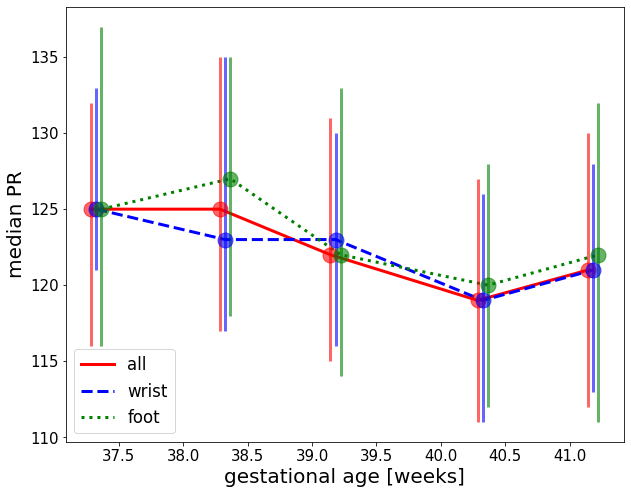

In [46]:
plt.figure(figsize=(10,8))
x = np.array(T['GEST_AGE_DAYS'])/7.
y = np.array(T['MED_PR'])

w_sel = np.where(T['WRIST']==True)
f_sel = np.where(T['FOOT']==True)


#plt.plot(T['GEST_AGE_DAYS']/7.,T['MED_PR'],".")

xx,yy,ey1,ey2 = median_in_bins_err(x,y,36.5,42,5)
plt.errorbar(xx,yy,yerr=[ey1,ey2],fmt=".",markersize=30,elinewidth=3,color='red',zorder=11,alpha=0.6)
plt.plot(xx,yy,color="red",lw=3,label ='all')

xx,yy,ey1,ey2 = median_in_bins_err(x[w_sel],y[w_sel],36.5,42,5)
plt.errorbar(xx+0.04,yy,yerr=[ey1,ey2],fmt=".",markersize=30,elinewidth=3,color='blue',zorder=11,alpha=0.6)
plt.plot(xx+0.04,yy,color="blue",lw=3,ls='dashed',label ='wrist')

xx,yy,ey1,ey2 = median_in_bins_err(x[f_sel],y[f_sel],36.5,42,5)
plt.errorbar(xx+0.08,yy,yerr=[ey1,ey2],fmt=".",markersize=30,elinewidth=3,color='green',zorder=11,alpha=0.6)
plt.plot(xx+0.08,yy,color="green",lw=3,ls='dotted',label ='foot')

plt.xlabel('gestational age [weeks]')
plt.ylabel('median PR')

plt.legend(fontsize='small',loc=3)
plt.savefig('../plots/019/PR_gest_age.jpeg')
plt.show()